<!-- metadata: title -->
# Life Expectancy by sex between 2000 and 2021 in Kenya (WHO)

<!-- metadata: subtitle -->
> ### Plot showing the life expectancy using data from the World Health Organization (WHO) between 2000 and 2021 in Kenya.
<!-- metadata: -->

**Published Date:**
<!-- metadata: date -->
2025-03-10
<!-- metadata: -->

**Keywords:**
<!-- metadata: keywords, is_array=true -->
  - kenya
  - population
  - year-2000
  - year-2021
  - life-expectancy
  - WHO
<!-- metadata: -->

**Categories:**
<!-- metadata: categories, is_array=true -->
  - data-science
<!-- metadata: -->

#### Imports

In [5]:
#| code-fold: true

import pandas as pd
import urllib.parse
import matplotlib.pyplot as plt
import seaborn as sns

def plot_who_data(
        raw_data: pd.DataFrame, 
        title: str, 
        year_col = "Year", 
        value_col = "Value", 
        pivot_columns = "Sex", 
        pivot_data_columns = [
            {
                "name": "TOTAL",
                "options": {
                    'marker': 'o',
                    'linewidth': 2,
                    'color': 'purple'
                }
            },
            {
                "name": "MALE",
                "options": {
                    'marker': 's',
                    'linewidth': 2,
                    'color': 'blue'
                }
            },
            {
                "name": "FEMALE",
                "options": {
                    'marker': '^',
                    'linewidth': 2,
                    'color': 'pink'
                }
            },
        ]):
    data = raw_data.copy()
    # Convert Year to numeric and Value to float
    data[year_col] = pd.to_numeric(data[year_col])
    data[value_col] = pd.to_numeric(data[value_col])
    # Pivot the data to have columns for each sex category
    pivot_data = data.pivot_table(index=year_col, columns=pivot_columns, values=value_col)
    # Set the style
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(12, 6))
    # Plot the data
    for column in pivot_data_columns:
        sex = column['name']
        ax.plot(pivot_data.index, pivot_data[sex], label=sex, **column['options'])
    # Add title and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(year_col, fontsize=12)
    ax.set_ylabel(value_col, fontsize=12)
    ax.legend(title=pivot_columns)
    ax.grid(True, alpha=0.3)
    # Add some annotations - show max and min values
    for sex in pivot_data.columns:
        max_year = pivot_data[sex].idxmax()
        max_val = pivot_data[sex].max()
        ax.annotate(f"max: {max_val:.1f}", 
                    xy=(max_year, max_val),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=9)
    # Adjust the layout
    fig.tight_layout()
    # Add data source note
    fig.text(0.1, 0.01, "Data Source: WHO Xmart API", fontsize=8, style='italic')
    # Add a watermark to the center of the plot
    ax.text(0.95, 0.02, 'ToKnow.ai', ha='right', va='bottom', 
        fontsize=18, color='gray', alpha=0.5, transform=ax.transAxes, rotation=45)

def url_encode(url):
    return urllib.parse.quote(url, safe=":/?&=$")

### Life expectancy, Kenya

The average number of years that a newborn could expect to live. Kenya, by sex, 2000 - 2021.

In [6]:
life_expectancy_filter = "IND_ID eq '90E2E48WHOSIS_000001' and GEO_NAME_SHORT eq 'Kenya'"
life_expectancy_select = "DIM_GEO_CODE_M49, GEO_NAME_SHORT, DIM_TIME, IND_NAME, DIM_SEX, AMOUNT_N"
life_expectancy_data = pd.read_csv(url_encode(
    f"https://xmart-api-public.who.int/DATA_/RELAY_WHS?$filter={life_expectancy_filter}&$select={life_expectancy_select}&$format=csv"),
    names=[
        "Country Code",
        "Country",
        "Year",
        "Indicator",
        "Sex",
        "Life expectancy (at birth)"
    ],
    header=1)

life_expectancy_data

,Country Code,Country,Year,Indicator,Sex,Life expectancy (at birth)
0,404,Kenya,2009,Life expectancy (at birth),TOTAL,60.490621
1,404,Kenya,2010,Life expectancy (at birth),TOTAL,61.282761
2,404,Kenya,2012,Life expectancy (at birth),TOTAL,62.615857
3,404,Kenya,2014,Life expectancy (at birth),TOTAL,63.636944
4,404,Kenya,2001,Life expectancy (at birth),TOTAL,54.332836
...,...,...,...,...,...,...
60,404,Kenya,2019,Life expectancy (at birth),FEMALE,68.991063
61,404,Kenya,2006,Life expectancy (at birth),FEMALE,59.008718
62,404,Kenya,2007,Life expectancy (at birth),FEMALE,60.214093
63,404,Kenya,2011,Life expectancy (at birth),FEMALE,64.116368


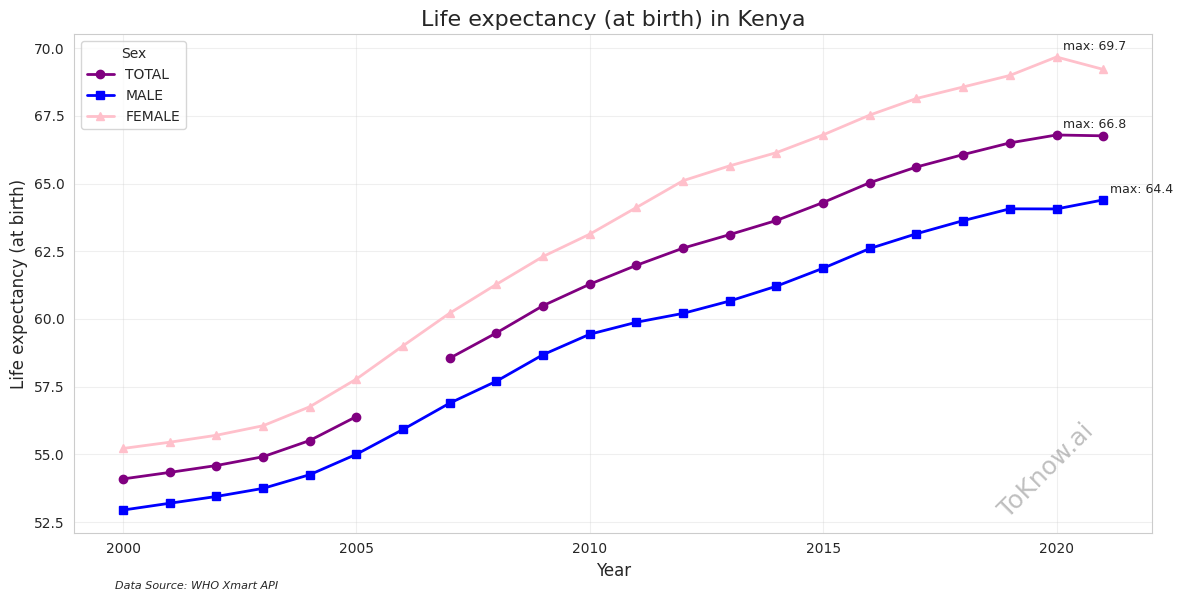

In [7]:
#| label: preview-image

plot_who_data(
    life_expectancy_data, 
    "Life expectancy (at birth) in Kenya", 
    value_col="Life expectancy (at birth)")

Summary Statistics

In [8]:
life_expectancy_data.pivot_table(
    index="Year", 
    columns="Sex", 
    values="Life expectancy (at birth)").describe()

Sex,FEMALE,MALE,TOTAL
count,22.000000,22.000000,21.000000
mean,62.856168,58.951730,61.050339
std,5.099057,3.984922,4.563089
min,55.217093,52.941969,54.092039
25%,58.087847,55.232042,56.395140
50%,63.623846,59.656871,61.981267
75%,67.346733,62.419297,65.032495
max,69.673467,64.395877,66.793450


### Healthy life expectancy (HALE) at birth


The average number of years that a person can expect to live in "full health" from birth. Kenya, by sex, 2000 - 2021.

In [9]:
healthy_life_expectancy_filter = "IND_ID eq 'C64284DWHOSIS_000002' and GEO_NAME_SHORT eq 'Kenya'"
healthy_life_expectancy_select = "DIM_GEO_CODE_M49, GEO_NAME_SHORT, DIM_TIME, IND_NAME, DIM_SEX, AMOUNT_N"
healthy_life_expectancy_data = pd.read_csv(url_encode(
    f"https://xmart-api-public.who.int/DATA_/RELAY_WHS?$filter={life_expectancy_filter}&$select={life_expectancy_select}&$format=csv"),
    names=[
        "Country Code",
        "Country",
        "Year",
        "Indicator",
        "Sex",
        "Healthy life expectancy (at birth)"
    ],
    header=1)

healthy_life_expectancy_data

,Country Code,Country,Year,Indicator,Sex,Healthy life expectancy (at birth)
0,404,Kenya,2009,Life expectancy (at birth),TOTAL,60.490621
1,404,Kenya,2010,Life expectancy (at birth),TOTAL,61.282761
2,404,Kenya,2012,Life expectancy (at birth),TOTAL,62.615857
3,404,Kenya,2014,Life expectancy (at birth),TOTAL,63.636944
4,404,Kenya,2001,Life expectancy (at birth),TOTAL,54.332836
...,...,...,...,...,...,...
60,404,Kenya,2019,Life expectancy (at birth),FEMALE,68.991063
61,404,Kenya,2006,Life expectancy (at birth),FEMALE,59.008718
62,404,Kenya,2007,Life expectancy (at birth),FEMALE,60.214093
63,404,Kenya,2011,Life expectancy (at birth),FEMALE,64.116368


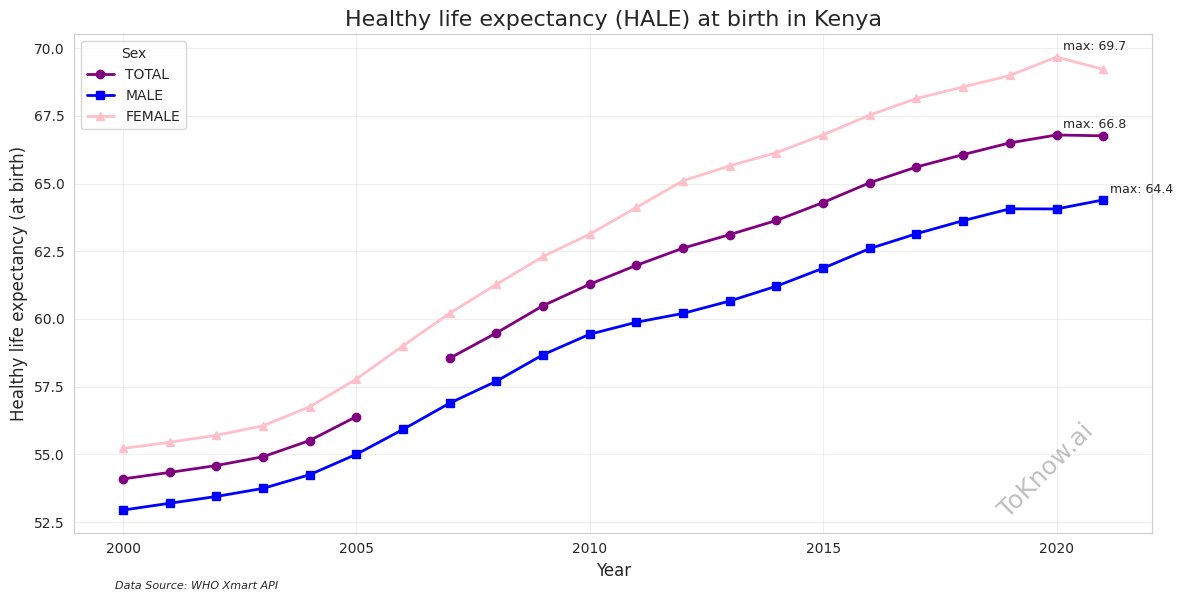

In [10]:
plot_who_data(
    healthy_life_expectancy_data, 
    "Healthy life expectancy (HALE) at birth in Kenya", 
    value_col="Healthy life expectancy (at birth)")

Summary Statistics

In [11]:
healthy_life_expectancy_data.pivot_table(
    index="Year", 
    columns="Sex", 
    values="Healthy life expectancy (at birth)").describe()

Sex,FEMALE,MALE,TOTAL
count,22.000000,22.000000,21.000000
mean,62.856168,58.951730,61.050339
std,5.099057,3.984922,4.563089
min,55.217093,52.941969,54.092039
25%,58.087847,55.232042,56.395140
50%,63.623846,59.656871,61.981267
75%,67.346733,62.419297,65.032495
max,69.673467,64.395877,66.793450


### References

Source: [World Health Organization (WHO)](https://data.who.int/countries/404)